In [1]:
import sys 
import os

%load_ext autoreload
%autoreload 2
SCRIPT_DIR = os.path.dirname(os.path.realpath(__vsc_ipynb_file__))
sys.path.append(os.path.dirname(SCRIPT_DIR))

import matplotlib.pyplot as plt
import matplotlib
from region_extractor import WorldWrapper


wrapper = WorldWrapper("/home/erzar/repos/MC/data/warty miasto v13 regular/warty miasto v13 regular")


INFO - PyMCTranslate Version 363
INFO - Loading level /home/erzar/repos/MC/data/warty miasto v13 regular/warty miasto v13 regular


In [2]:
coords = sorted(wrapper._mca_coords)

inhabited_times = wrapper.mca_inhabited_times(1, 1) 

INFO - NumExpr defaulting to 6 threads.


(32, 32)


<Axes: >

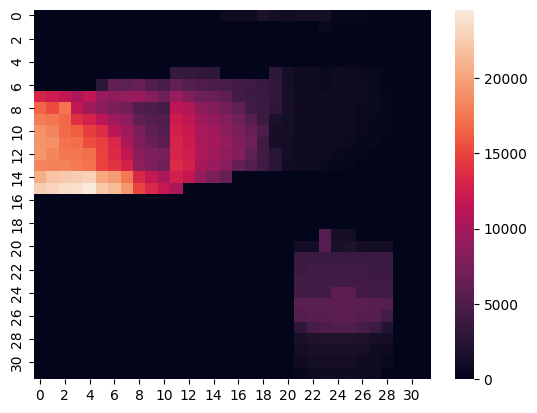

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

print(inhabited_times.shape)
sns.heatmap(inhabited_times)

In [4]:
region = wrapper.get_region_volume(0, 0)

In [5]:
print(wrapper.mca_coords)

((3, -1), (0, -6), (3, 0), (0, -1), (5, -3), (2, 4), (-3, 6), (3, -6), (0, 3), (-3, 0), (-1, -1), (0, -20), (0, -5), (3, 6), (0, 1), (-1, 4), (0, -3), (-5, 1), (-3, -3), (1, -2), (1, -4), (5, -4), (-1, -9), (-3, 4), (1, -5), (-5, -3), (-1, -8), (0, -7), (-1, -19), (2, 2), (1, -9), (-2, -2), (0, 5), (0, -15), (-2, -4), (0, -9), (-2, 3), (3, -2), (-1, 5), (3, 1), (4, -6), (0, -17), (-1, 6), (2, -8), (-1, 0), (-4, -1), (-1, 3), (3, -5), (1, -1), (0, 6), (-1, -21), (2, 0), (-1, -22), (5, -2), (-1, -17), (1, -3), (1, 6), (-1, -14), (-3, 2), (-1, 1), (-1, 2), (0, 0), (-3, 3), (3, -4), (-1, -2), (1, 3), (-3, -4), (0, -18), (4, 1), (1, 4), (2, -7), (-2, 1), (4, -2), (5, 1), (-4, -2), (-2, 6), (2, -4), (4, -5), (-1, -4), (-2, 5), (3, 5), (-4, -3), (-1, -15), (-1, -20), (-5, -2), (0, -4), (-5, 2), (-1, -3), (-5, -1), (-2, 0), (5, 0), (0, -16), (-1, -10), (0, -10), (-2, -3), (1, 2), (4, -1), (0, 2), (3, -9), (3, 3), (2, -5), (4, 0), (-1, -5), (-1, -7), (5, -1), (1, -8), (5, 2), (-3, -2), (-1, -18

In [6]:

print(wrapper._blockstates._blockstates_dict)

{'universal_minecraft:air': 0, 'universal_minecraft:bedrock[infiniburn="false"]': 1, 'universal_minecraft:stone': 2, 'universal_minecraft:diorite[polished="false"]': 3, 'universal_minecraft:gravel': 4, 'universal_minecraft:andesite[polished="false"]': 5, 'universal_minecraft:diamond_ore': 6, 'universal_minecraft:granite[polished="false"]': 7, 'universal_minecraft:redstone_ore[lit="false"]': 8, 'universal_minecraft:iron_ore': 9, 'universal_minecraft:coal_ore': 10, 'universal_minecraft:dirt': 11, 'universal_minecraft:lapis_ore': 12, 'universal_minecraft:gold_ore': 13, 'universal_minecraft:water[falling="false",flowing="true",level="0"]': 14, 'universal_minecraft:water[falling="false",flowing="false",level="0"]': 15, 'universal_minecraft:sand': 16, 'universal_minecraft:clay': 17, 'universal_minecraft:coarse_dirt': 18, 'universal_minecraft:water[falling="true",flowing="true",level="1"]': 19, 'universal_minecraft:water[falling="true",flowing="false",level="0"]': 20, 'universal_minecraft:lav

In [7]:
import numpy as np
print(region.shape)

ids, cnts = np.unique(region, return_counts=True)
for block_id, count in sorted(zip(ids, cnts), key=lambda x: x[1], reverse=True):
    print(f"Block ID {block_id}: {count} blocks")

(512, 512, 303)
Block ID 0: 47090426 blocks
Block ID 11: 31025642 blocks
Block ID 1: 262147 blocks
Block ID 45: 223555 blocks
Block ID 18: 151790 blocks
Block ID 315: 151063 blocks
Block ID 226: 57731 blocks
Block ID 471: 35454 blocks
Block ID 600: 30869 blocks
Block ID 397: 27971 blocks
Block ID 399: 25834 blocks
Block ID 198: 24078 blocks
Block ID 5: 23629 blocks
Block ID 256: 22717 blocks
Block ID 2: 20072 blocks
Block ID 219: 13430 blocks
Block ID 587: 12594 blocks
Block ID 218: 9758 blocks
Block ID 354: 9285 blocks
Block ID 463: 7901 blocks
Block ID 472: 6577 blocks
Block ID 257: 6284 blocks
Block ID 27: 5658 blocks
Block ID 545: 5515 blocks
Block ID 73: 4939 blocks
Block ID 392: 4893 blocks
Block ID 7: 4770 blocks
Block ID 393: 4305 blocks
Block ID 239: 4020 blocks
Block ID 261: 3926 blocks
Block ID 4: 3555 blocks
Block ID 923: 2733 blocks
Block ID 89: 2658 blocks
Block ID 1036: 2653 blocks
Block ID 388: 2645 blocks
Block ID 421: 2151 blocks
Block ID 407: 2143 blocks
Block ID 480

In [8]:
print(sys.getsizeof(region) / (1024 ** 2), "MB")

0.0001373291015625 MB


In [9]:
import blosc2
import time

time_start = time.time()
compressed_region = blosc2.pack_array2(np.ascontiguousarray(region), chunksize=512**3)
time_end = time.time()
print(sys.getsizeof(compressed_region) / (1024 ** 2), "MB")
print(f"Time taken: {time_end - time_start:.4f} seconds")

1.0843877792358398 MB
Time taken: 0.1357 seconds


In [10]:
print(np.unique(region[:, :, -1], return_counts=True))

(array([  0,  73, 554], dtype=uint16), array([262030,     71,     43]))


In [11]:
import napari
import numpy as np

import napari
import numpy as np

# 1. Create the viewer first
viewer = napari.Viewer()

# 2. Add your region data
# Note: Napari expects (Z, Y, X) or (Y, X, Z) usually. 
# If it looks 'sideways', use np.transpose(region, (2, 0, 1))
viewer.add_image(region, name='Minecraft Region', interpolation2d="nearest", interpolation3d="nearest", colormap="hsv")
# interpolate inhabited times 32 -> 512 for better visualization
tmp: np.array = np.kron(inhabited_times, np.ones((16, 16)))
tmp = tmp[:, :, None]  # add a dummy z-axis
viewer.add_image(tmp, name='Inhabited Times', colormap="Greys_r", interpolation2d="linear", interpolation3d="linear", blending="multiplicative")


# 3. Start the event loop (this keeps the window open)
napari.run()

WARNING - QSocketNotifier: Can only be used with threads started with QThread


INFO - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
